<a href="https://colab.research.google.com/github/danielhandong/Classification_images-/blob/main/average_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
img_shape = 224
batch_size = 32

ds_train = tf.keras.preprocessing.image_dataset_from_directory(
        directory = "/content/drive/MyDrive/split_data/train",
        labels = "inferred" ,
        label_mode = "binary",
        color_mode = "rgb",
        batch_size = batch_size,
        image_size = (img_shape, img_shape),
        shuffle = True,
#         seed = 100,
#         validation_split = 0.3,
#         subset = "training"
)

ds_val = tf.keras.preprocessing.image_dataset_from_directory(
    directory = "/content/drive/MyDrive/split_data/val",
    labels = "inferred",
    label_mode = "binary",
    color_mode = "rgb",
    batch_size = batch_size,
    image_size = (img_shape, img_shape),
    shuffle = True,
#     seed = 100,
#     validation_split = 0.3,
#     subset = "validation"
)

ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/split_data/test',
    labels = "inferred",
    label_mode = "binary",
    color_mode = "rgb",
    batch_size = batch_size,
    image_size = (img_shape, img_shape),
    shuffle = False

)

Found 5576 files belonging to 2 classes.
Found 400 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


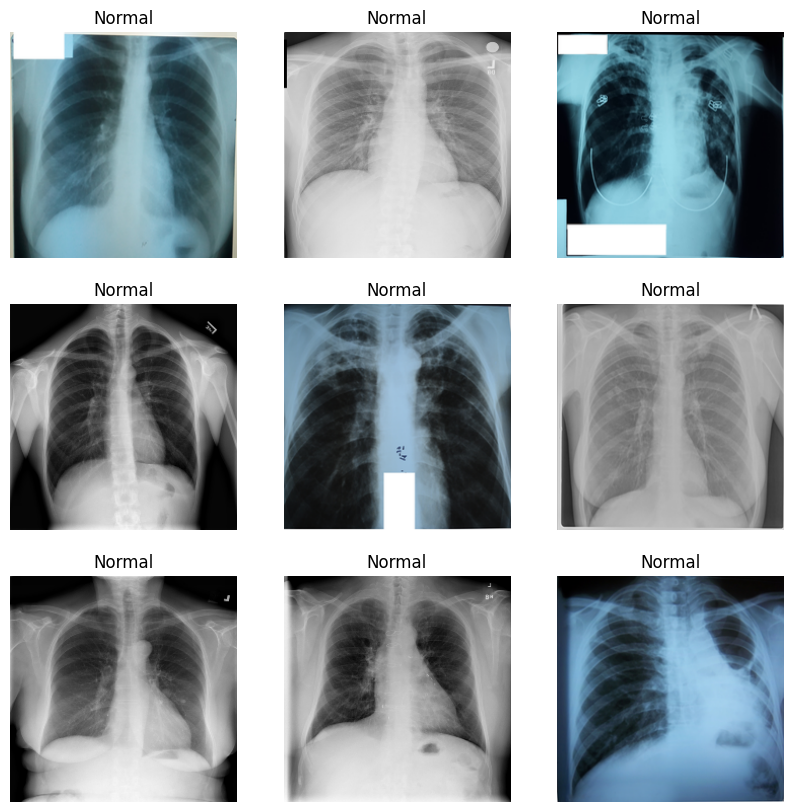

In [2]:
import matplotlib.pyplot as plt
import numpy as np
class_names = ds_train.class_names
plt.figure(figsize=(10,10))
for images, labels in ds_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        label = np.argmax(labels[i].numpy())
        class_name = class_names[label]
        plt.title(class_name)
        plt.axis("off")
plt.show()

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# import keras_cv



#Data Augmentation
#soft augmentation
data_augment_layers = [
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
]



#Hard augmentation
# rand Augmenat
# rand_data_augment_layers = keras_cv.Layers.RandAugment(
#     value_range = (0,255),
#     augmentations_per_image = 3,
#     magnitude = 0.5,
#     magnitude_stddev = 0.15,
#     rate = 0.9090909090909091,
#     geometric = True,
#     seed = None,
# )


def data_augment(images):
    for layer in data_augment_layers:
        images = layer(images)
    return images


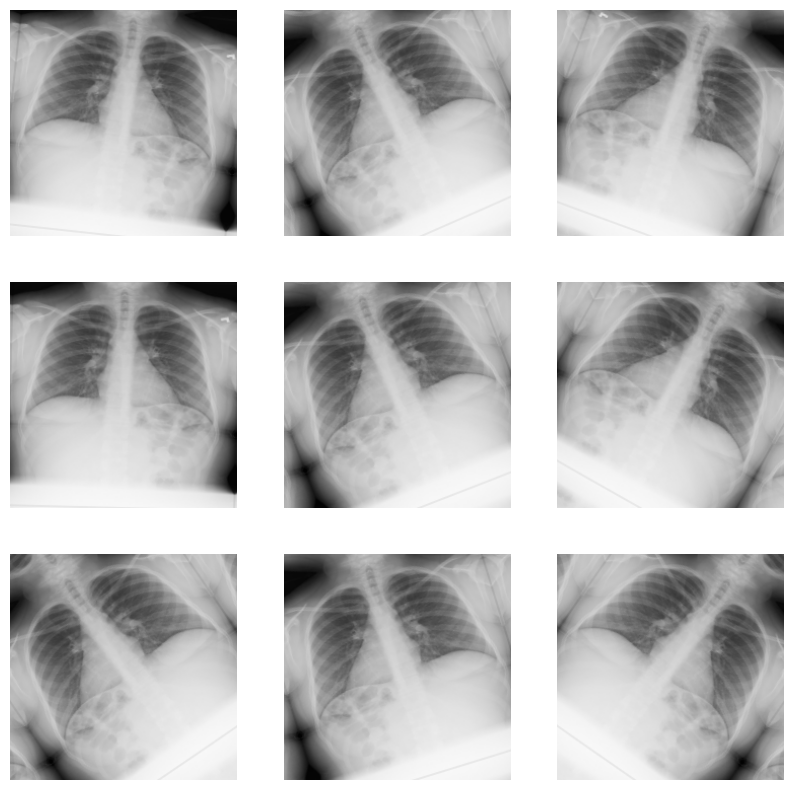

In [5]:
#Plotting augmented images
plt.figure(figsize=(10,10))
for images, _ in ds_train.take(1):
    for i in range(9):
        augmented_images = data_augment(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")

In [6]:
# using gaussian noise for image noising
def add_gaussian_noise(image):
    #add Guassian noise to an image
    noise = tf.random.normal(shape=tf.shape(image), mean=0.0, stddev=0.1, dtype=tf.float32)
    noisy_image = image + noise
    return tf.clip_by_value(noisy_image, 0.0,1.0)# ensuring the image is still in [0,1]

def prepare_dataset(images, labels, training=False):
    #rescale images from [0,255] to [0,1 ] and add noise if training
    images = tf.cast(images, tf.float32) / 255.0
    if training:
        images = add_gaussian_noise(images)
    return images, labels

#Apply the preprocessing function with noise addition
# ds_train = ds_train.map(lambda x, y: prepare_dataset(x, y, training=False))
# ds_val = ds_val.map(lambda x, y: prepare_dataset(x, y, training=False))
ds_test = ds_test.map(lambda x, y: prepare_dataset(x, y, training=False))

In [7]:
ds_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

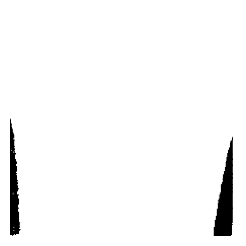

In [8]:
#plotting noised images
def plot_images(dataset, num_images=9):
    plt.figure(figsize=(10,10))
    for images, _ in dataset.take(1): #take one batch from the dataset
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy())
        plt.axis("off")
    plt.show()
#plotting images with noise
plot_images(ds_train)

In [ ]:
# !pip uninstall keras
# !pip install tensorflow



In [9]:
import os
print(os.getcwd())  # Check the current working directory

# If needed, change the working directory to the folder where your .py file is located
#os.chdir('/content/drive/MyDrive/Colab Notebooks')


/content


In [ ]:
# from tensorflow.keras.models import load_model
# import tensorflow as tf


# # class ClassToken(tf.keras.layers.Layer):
# #     def __init__(self, **kwargs):
# #         super(ClassToken, self).__init__(**kwargs)

# #     def build(self, input_shape):
# #         w_init = tf.random_uniform_initializer()
# #         self.w = tf.Variable(
# #             initial_value=w_init(shape=(1, 1, input_shape[-1]), dtype="float32"),
# #             trainable=True
# #         )

# #     def call(self, inputs):
# #         batch_size = tf.shape(inputs)[0]
# #         hidden_dim = self.w.shape[-1]

# #         cls = tf.broadcast_to(self.w, [batch_size, 1, hidden_dim])
# #         cls = tf.cast(cls, dtype=inputs.dtype)

# #         return cls

# #     def get_config(self):
# #         config = super(ClassToken, self).get_config()
# #         return config




# # from keras.models import load_model

# # Define the custom objects in a dictionary
# # custom_objects = {
# #     'ClassToken': ClassToken
# # }

# from tensorflow.keras.models import load_model
# from model_update import get_model, channel_attention, spatial_attention, set_layer_trainability





# # model = get_model("resnet50v2", (img_shape,img_shape,3), num_classes = 2, augment=False, all_trainable=True, attention="None")

# custom_objects = {
#     'channel_attention': channel_attention,
#     'spatial_attention': spatial_attention
# }

# # model = model.load_weights('/content/drive/MyDrive/ensemble/trained_model/resnet.keras')


# model1 = load_model('/content/drive/MyDrive/ensemble/trained_model/resnet.keras', custom_objects={'channel_attention': channel_attention, 'spatial_attention': spatial_attention})



# # Load your model, providing the custom_objects dictionary
# # model1 = load_model('/content/drive/MyDrive/ensemble/trained_model/resnet.keras', compile=False)
# # model.summary()
# # model2 = load_model('/kaggle/input/model-vit/models-ensemble/models-ensemble/MobilenetViT.h5', custom_objects=custom_objects)
# # model2 = load_model('/content/drive/MyDrive/savemoddel /efficientnet2s.keras')
# # model4 = load_model('/kaggle/input/model-vit/models-ensemble/models-ensemble/XceptionViT.h5', custom_objects=custom_objects)
# #model3 = load_model('/content/drive/MyDrive/savemoddel /resnet50v2.keras')

# #custom_objects=custom_objects




In [10]:
!pip install --upgrade tensorflow keras


In [11]:
!ls '/content/drive/MyDrive/savemoddel '


efficientnetv2s.keras  mobilenetv2.keras  resnet50v2.keras


In [12]:
from tensorflow.keras.models import load_model
model1 = load_model('/content/drive/MyDrive/savemoddel /mobilenetv2.keras', compile=False)
model1.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_1               │ (None, 1280)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,914,369 (11.12 MB)

 Trainable params: 2,880,257 (10.99 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [13]:
from tensorflow.keras.models import load_model
model2 = load_model('/content/drive/MyDrive/savemoddel /resnet50v2.keras', compile=False)
model2.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50v2 (Functional)              │ (None, 7, 7, 2048)          │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,614,401 (93.90 MB)

 Trainable params: 24,568,961 (93.72 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [14]:
from tensorflow.keras.models import load_model
model3 = load_model('/content/drive/MyDrive/efficientnetv2s.keras', compile=False)
model3.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-s (Functional)        │ (None, 7, 7, 1280)          │      20,331,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 1280)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,987,745 (80.06 MB)

 Trainable params: 20,833,873 (79.47 MB)

 Non-trainable params: 153,872 (601.06 KB)

In [12]:
# from tensorflow.keras.models import load_model
# model4 = load_model('/content/drive/MyDrive/cnn_model.h5', compile=False)
# model4.summary()

In [15]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import load_model


In [ ]:
# model3 = get_model("mobilenet", (img_shape,img_shape,3), num_classes = 2, augment=False, all_trainable=True, attention="None")
# model3 = model3.load_weights('/content/drive/MyDrive/ensemble/trained_model/mobilenet.keras')


Model loaded successfully from /content/drive/MyDrive/efficientnetv2s.keras


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


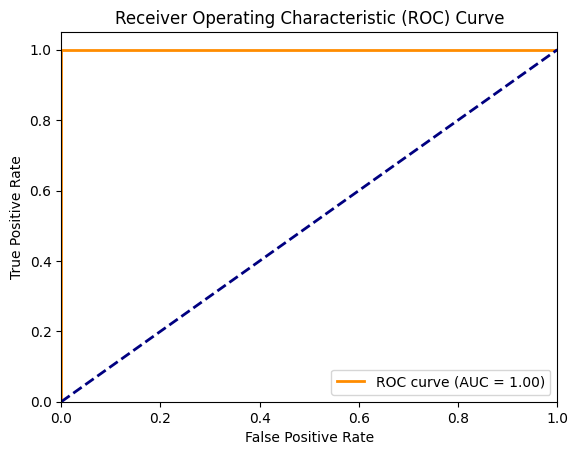

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import load_model

# Load the pre-trained model
model_path = '/content/drive/MyDrive/efficientnetv2s.keras'  # Path to your model file
try:
    model = load_model(model_path)  # Load your pre-trained model
    print(f"Model loaded successfully from {model_path}")
except Exception as e:
    print(f"Error loading model: {e}")

# Extracting true labels and predicted probabilities from ds_test
y_true = []
y_pred_probs = []

for images, labels in ds_test:
    # Get predicted probabilities from the model
    probs = model.predict(images)

    y_true.extend(labels.numpy())  # Add true labels
    y_pred_probs.extend(probs)     # Add predicted probabilities

y_true = np.array(y_true).flatten()        # Flatten the array to a 1D array
y_pred_probs = np.array(y_pred_probs).flatten()  # Flatten the predicted probabilities

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Model loaded successfully from /content/drive/MyDrive/savemoddel /mobilenetv2.keras


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


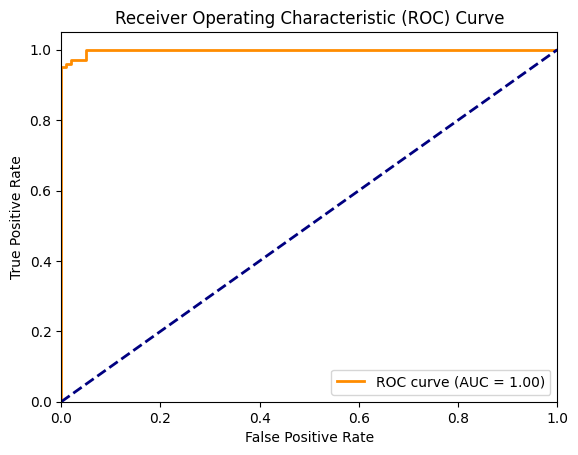

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import load_model

# Load the pre-trained model
model_path = '/content/drive/MyDrive/savemoddel /mobilenetv2.keras'  # Path to your model file
try:
    model = load_model(model_path)  # Load your pre-trained model
    print(f"Model loaded successfully from {model_path}")
except Exception as e:
    print(f"Error loading model: {e}")

# Extracting true labels and predicted probabilities from ds_test
y_true = []
y_pred_probs = []

for images, labels in ds_test:
    # Get predicted probabilities from the model
    probs = model.predict(images)

    y_true.extend(labels.numpy())  # Add true labels
    y_pred_probs.extend(probs)     # Add predicted probabilities

y_true = np.array(y_true).flatten()        # Flatten the array to a 1D array
y_pred_probs = np.array(y_pred_probs).flatten()  # Flatten the predicted probabilities

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Model loaded successfully from /content/drive/MyDrive/savemoddel /resnet50v2.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


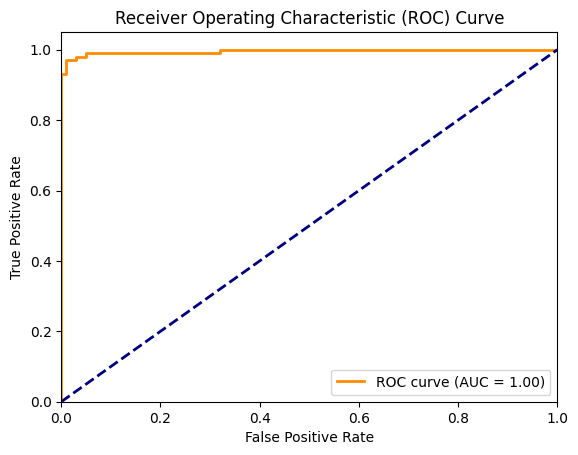

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import load_model

# Load the pre-trained model
model_path = '/content/drive/MyDrive/savemoddel /resnet50v2.keras'  # Path to your model file
try:
    model = load_model(model_path)  # Load your pre-trained model
    print(f"Model loaded successfully from {model_path}")
except Exception as e:
    print(f"Error loading model: {e}")

# Extracting true labels and predicted probabilities from ds_test
y_true = []
y_pred_probs = []

for images, labels in ds_test:
    # Get predicted probabilities from the model
    probs = model.predict(images)

    y_true.extend(labels.numpy())  # Add true labels
    y_pred_probs.extend(probs)     # Add predicted probabilities

y_true = np.array(y_true).flatten()        # Flatten the array to a 1D array
y_pred_probs = np.array(y_pred_probs).flatten()  # Flatten the predicted probabilities

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [28]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import cv2
import os
# Load the trained model (replace with your trained model file)
model = tf.keras.models.load_model('/content/drive/MyDrive/cnn_model.h5')

# Function to load and preprocess the image for the model
def preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize to 0-1 range
    return img

# Function to generate Grad-CAM heatmap
def generate_gradcam(model, img_array, last_conv_layer_name, pred_index=None):
    grad_model = Model(inputs=model.inputs, outputs=[model.get_layer(last_conv_layer_name).output, model.output])

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Compute gradients of the target class w.r.t. the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Compute the mean intensity of the gradient over each feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel by "how important this channel is" with regard to the class
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize heatmap between 0 and 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Function to overlay heatmap on the image
def overlay_heatmap(heatmap, img_path, alpha=0.4):
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Overlay the heatmap on the original image
    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)
    return superimposed_img

# Path to the test image
#img_path = '/content/drive/MyDrive/split_data/test'
# Path to the test directory
test_dir = '/content/drive/MyDrive/split_data/test/Normal'

# List all files in the directory
image_files = os.listdir(test_dir)

# Select the first image from the directory (or choose any specific image)
img_path = os.path.join(test_dir, image_files[0])  # This will load the first image in the folder


# Preprocess the image
img_array = preprocess_image(img_path, target_size=(224, 224))

# Generate Grad-CAM heatmap (Replace 'conv_5_block3_out' with your last conv layer)
last_conv_layer_name = 'conv_5_block3_out'  # Modify based on your model's architecture
heatmap = generate_gradcam(model, img_array, last_conv_layer_name)

# Display Grad-CAM overlay
superimposed_img = overlay_heatmap(heatmap, img_path)

# Save and display the superimposed image
cv2.imwrite('gradcam_output.jpg', superimposed_img)
plt.imshow(superimposed_img)
plt.axis('off')
plt.show()


ValueError: No such layer: conv_5_block3_out. Existing layers are: ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1'].

In [29]:
import tensorflow as tf
import numpy as np
from keras.models import load_model
from sklearn.metrics import accuracy_score
image_batches = []
label_batches = []
for images, labels in ds_test:
  image_batches.append(images.numpy())
  label_batches.append(labels.numpy())
images = np.concatenate(image_batches, axis=0)
labels = np.concatenate(label_batches, axis=0)
# Load pre-trained models (ensure the models are trained for binary classification)
# model1 = load_model("path_to_model1.h5")
# model2 = load_model("path_to_model2.h5")
# model3 = load_model("path_to_model3.h5")


models = [model1, model2, model3]

# Check if any model is None
for i, model in enumerate(models):
    if model is None:
        print(f"Model {i+1} is None. Check model loading process.")
    else:
        print(f"Model {i+1} loaded successfully.")

# Get predictions for each model on the test dataset (assuming ds_test is the test dataset)
# Each model.predict(ds_test) returns probabilities for the positive class (Tuberculosis)
preds = [model.predict(ds_test) for model in models]

# Convert list of predictions into a NumPy array of shape (num_models, num_samples, 1)
preds = np.array(preds)

# Sum or average the predictions across the models
# For average ensemble, use np.mean. If you want to apply different weights, you can use np.average
ensemble_preds = np.mean(preds, axis=0)

# Apply threshold to convert probabilities to binary class labels
threshold = 0.5
ensemble_prediction = (ensemble_preds >= threshold).astype(int)

# Extract true labels from test dataset
y_test = np.concatenate([y for x, y in ds_test], axis=0)

# If y_test is one-hot encoded, convert it to class labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

# Print individual model predictions and their accuracies
for i, model_preds in enumerate(preds):
    model_prediction = (model_preds >= threshold).astype(int)
    accuracy = accuracy_score(y_test, model_prediction)
    print(f'Accuracy Score for model {i+1} = {accuracy:.4f}')
    print(f'Model {i+1} Predictions: {model_prediction.flatten()}')  # Printing the individual model predictions

# Calculate accuracy for the ensemble prediction
ensemble_accuracy = accuracy_score(y_test, ensemble_prediction)
print(f'Accuracy Score for ensemble = {ensemble_accuracy:.4f}')
print(f'Ensemble Predictions: {ensemble_prediction.flatten()}')  # Printing the ensemble predictions


Model 1 loaded successfully.
Model 2 loaded successfully.
Model 3 loaded successfully.
7/7 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 52s 6s/step
Accuracy Score for model 1 = 0.9200
Model 1 Predictions: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy Score for model 2 = 0.9750
Model 2 Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1

In [ ]:
# print("Predictions from individual models:")
# print(preds)

In [ ]:
# print("Combined predictions (before argmax):")
# print(summed)


In [ ]:
# print("Combined predictions (before argmax):")
# print(summed)


In [ ]:
# # Assuming preds is a NumPy array containing predictions
# # Display the prediction scores for the first few data points
# print("Prediction Scores for the first few data points:")
# print(preds[:5])  # Replace 5 with the number of data points you want to display

# # You can also access specific data points and classes
# data_point_index = 0  # Change this to the index of the data point you want to inspect
# class_index = 0  # Change this to the index of the class you want to inspect
# print(f"Prediction scores for data point {data_point_index} for all classes: {preds[data_point_index]}")
# print(f"Prediction score for data point {data_point_index}, class {class_index}: {preds[data_point_index, class_index]}")


Model 1 loaded successfully.
Model 2 loaded successfully.
Model 3 loaded successfully.
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 299ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step
Accuracy Score for model 1 = 0.92
Accuracy Score for model 2 = 0.975
Accuracy Score for model 3 = 0.99
Accuracy Score for ensemble = 1.0


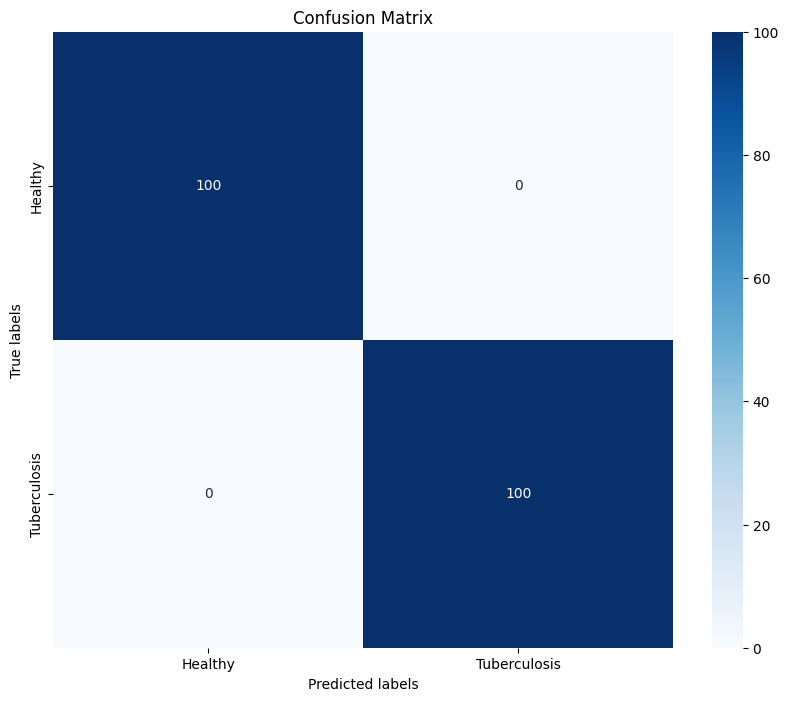

Classification Report:
               precision    recall  f1-score   support

     Healthy       1.00      1.00      1.00       100
Tuberculosis       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
import tensorflow as tf
import numpy as np
from keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load pre-trained models (ensure the models are trained for binary classification)
# model1 = load_model("path_to_model1.h5")
# model2 = load_model("path_to_model2.h5")
# model3 = load_model("path_to_model3.h5")

models = [model1, model2, model3]

# Check if any model is None
for i, model in enumerate(models):
    if model is None:
        print(f"Model {i+1} is None. Check model loading process.")
    else:
        print(f"Model {i+1} loaded successfully.")

# Get predictions for each model on the test dataset (assuming ds_test is the test dataset)
# Each model.predict(ds_test) returns probabilities for the positive class (Tuberculosis)
preds = [model.predict(ds_test) for model in models]

# Convert list of predictions into a NumPy array of shape (num_models, num_samples, 1)
preds = np.array(preds)

# Sum or average the predictions across the models
# For average ensemble, use np.mean. If you want to apply different weights, you can use np.average
ensemble_preds = np.mean(preds, axis=0)

# Apply threshold to convert probabilities to binary class labels
threshold = 0.5
ensemble_prediction = (ensemble_preds >= threshold).astype(int)

# Extract true labels from test dataset
y_test = np.concatenate([y for x, y in ds_test], axis=0)

# If y_test is one-hot encoded, convert it to class labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

# Calculate accuracy for individual models
for i, model_preds in enumerate(preds):
    accuracy = accuracy_score(y_test, (model_preds >= threshold).astype(int))
    print(f'Accuracy Score for model {i+1} = {accuracy}')

# Calculate accuracy for the ensemble prediction
ensemble_accuracy = accuracy_score(y_test, ensemble_prediction)
print('Accuracy Score for ensemble =', ensemble_accuracy)

# Compute the confusion matrix
cm = confusion_matrix(y_test, ensemble_prediction)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", xticklabels=['Healthy', 'Tuberculosis'], yticklabels=['Healthy', 'Tuberculosis'])
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# Generate and print classification report
report = classification_report(y_test, ensemble_prediction, target_names=['Healthy', 'Tuberculosis'])
print("Classification Report:\n", report)
